<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
pathtofile = './sat_scores.csv'

with open(pathtofile, 'r') as f:
    readCSV = [line for line in csv.reader(f)]
f.close()


In [3]:
readCSV[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
#making dataframe with dictionary
#split into list of keys and list of values
header = readCSV[0]
body = readCSV[1:]

#group the same values together
transposed = zip(*body)

# converting list of tuples into list of lists.
values = []
for t in transposed:
    values.append(list(t))
    
data = dict(zip(header, values))
pprint(data)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

In [5]:
dict_to_df = pd.DataFrame.from_dict(data)
dict_to_df.head()

Math Rate State Verbal
0  510   82    CT    509
1  513   81    NJ    499
2  515   79    MA    511
3  505   77    NY    495
4  516   72    NH    520

In [6]:
#making dataframe with read_csv

df = pd.read_csv(pathtofile)
df

State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [7]:
print dict_to_df.dtypes
print df.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [8]:
#Dataframe for question 6.
df6 = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
df.head(10)
# We have states and their test metrics:
# Rate = percent of students that take the SAT
# Verbal = average verbal score
# Math = average math score

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

In [11]:
df.columns.values

array(['State', 'Rate', 'Verbal', 'Math'], dtype=object)

In [12]:
df.describe()

Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000

In [13]:
type(df.describe())

pandas.core.frame.DataFrame

In [14]:
df.shape

(52, 4)

#### Anomaly detected in last row.

In [15]:
print df.tail(3)

   State  Rate  Verbal  Math
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514


In [16]:
all_avg = df[df.State == 'All']
df = df[df.State != 'All']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [17]:
data_dictionary ={'shape': {'row': 52,
                            'col': 4
                           },
                  'columns' : ['State', 'Rate', 'Verbal', 'Math'],
                  }

data_dictionary.update(df.describe().to_dict(orient='dict'))

data_dictionary


{'Math': {'25%': 503.0,
  '50%': 525.0,
  '75%': 557.5,
  'count': 51.0,
  'max': 603.0,
  'mean': 531.843137254902,
  'min': 439.0,
  'std': 36.28739315465888},
 'Rate': {'25%': 9.0,
  '50%': 33.0,
  '75%': 64.0,
  'count': 51.0,
  'max': 82.0,
  'mean': 37.0,
  'min': 4.0,
  'std': 27.550680572356104},
 'Verbal': {'25%': 501.0,
  '50%': 527.0,
  '75%': 562.0,
  'count': 51.0,
  'max': 593.0,
  'mean': 532.5294117647059,
  'min': 482.0,
  'std': 33.360667224248665},
 'columns': ['State', 'Rate', 'Verbal', 'Math'],
 'shape': {'col': 4, 'row': 52}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [18]:
type(df.Rate)

pandas.core.series.Series

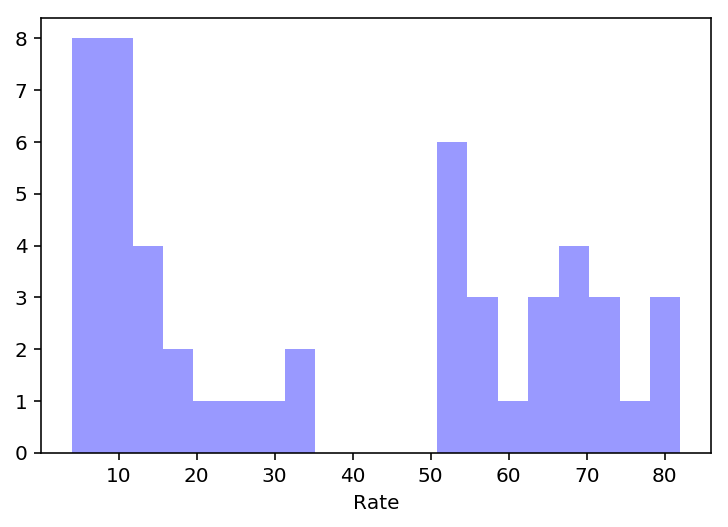

In [23]:
sns.distplot(df.Rate, color='blue', bins=20, kde=False);

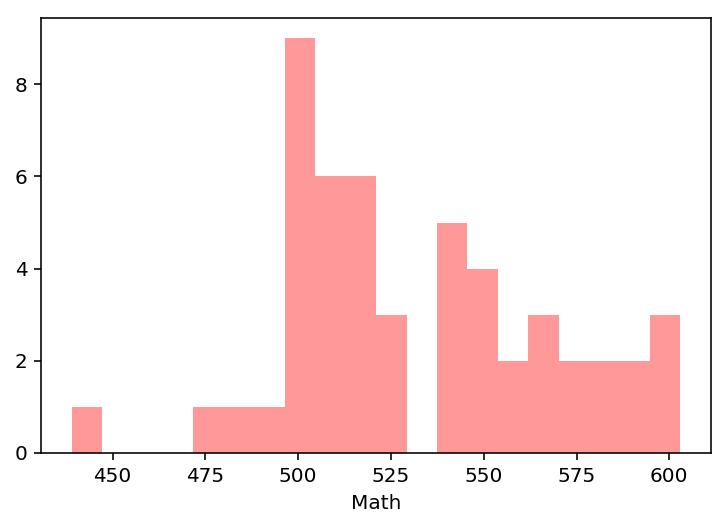

In [24]:
sns.distplot(df.Math, color='red', bins=20, kde=False);

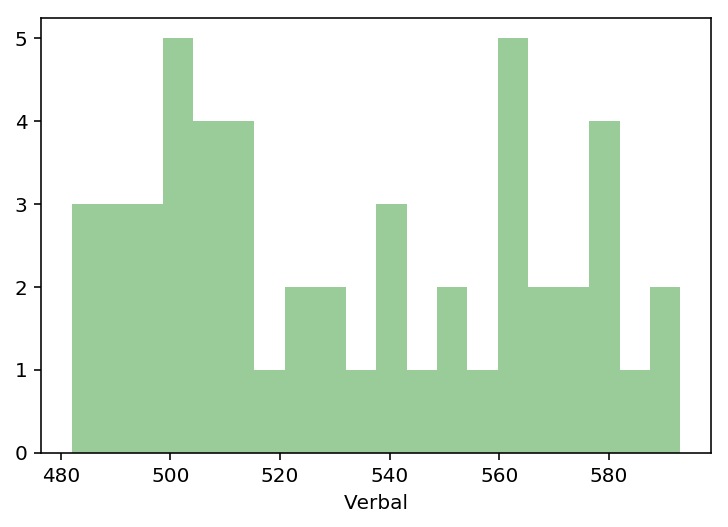

In [25]:
sns.distplot(df.Verbal, color='green', bins=20, kde=False);

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

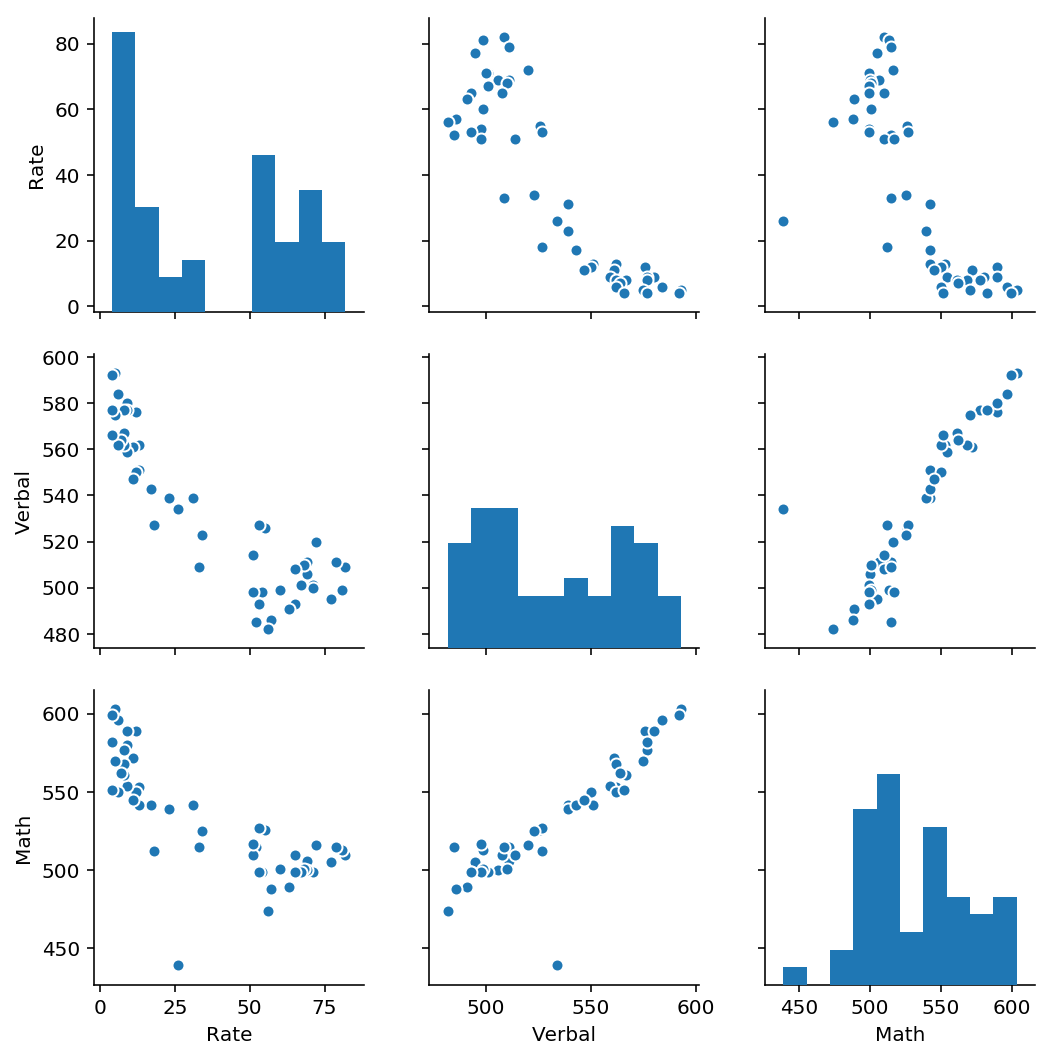

In [26]:
sns.pairplot(df);

**Analysis**:
1. Increasing Rate is associated with lower scores in Math and Verbal, though perhaps not that strongly.
2. Verbal and Math scores are correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

### I shall demonstrate using both matplotlib and seaborn for plotting

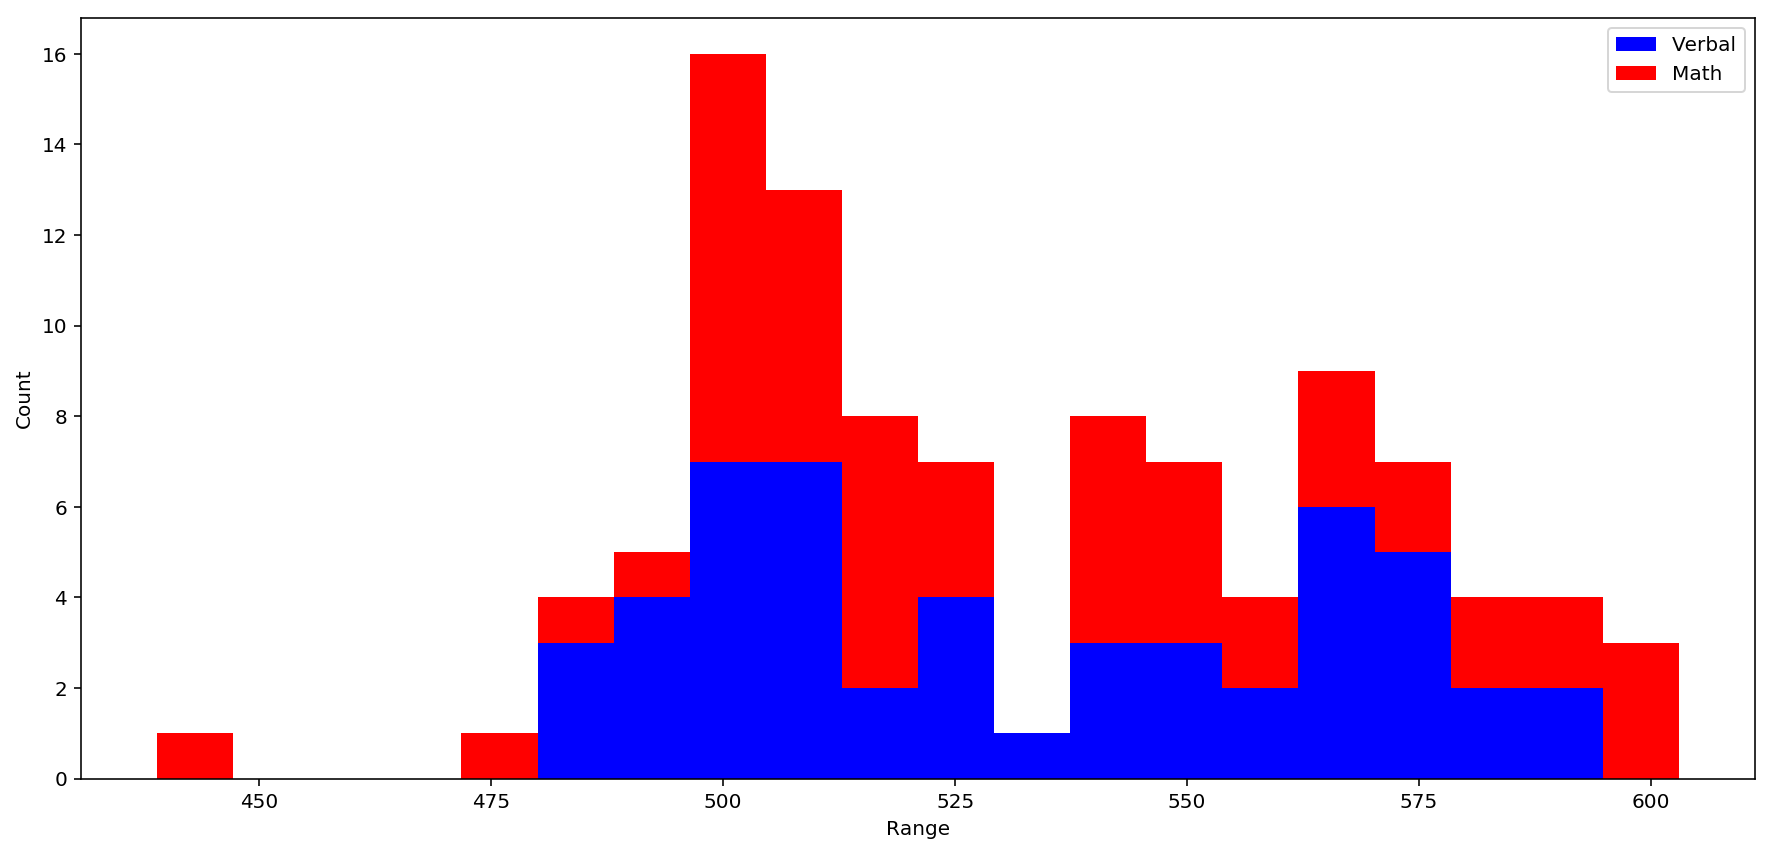

In [28]:
fig = plt.figure(figsize=(15,7))

plt.xlabel('Range')
plt.ylabel('Count')
plt.hist([df.Verbal, df.Math], bins=20, color=['blue','red'],
         label=['Verbal','Math'], stacked=True )
plt.legend();

#### Using Seaborn

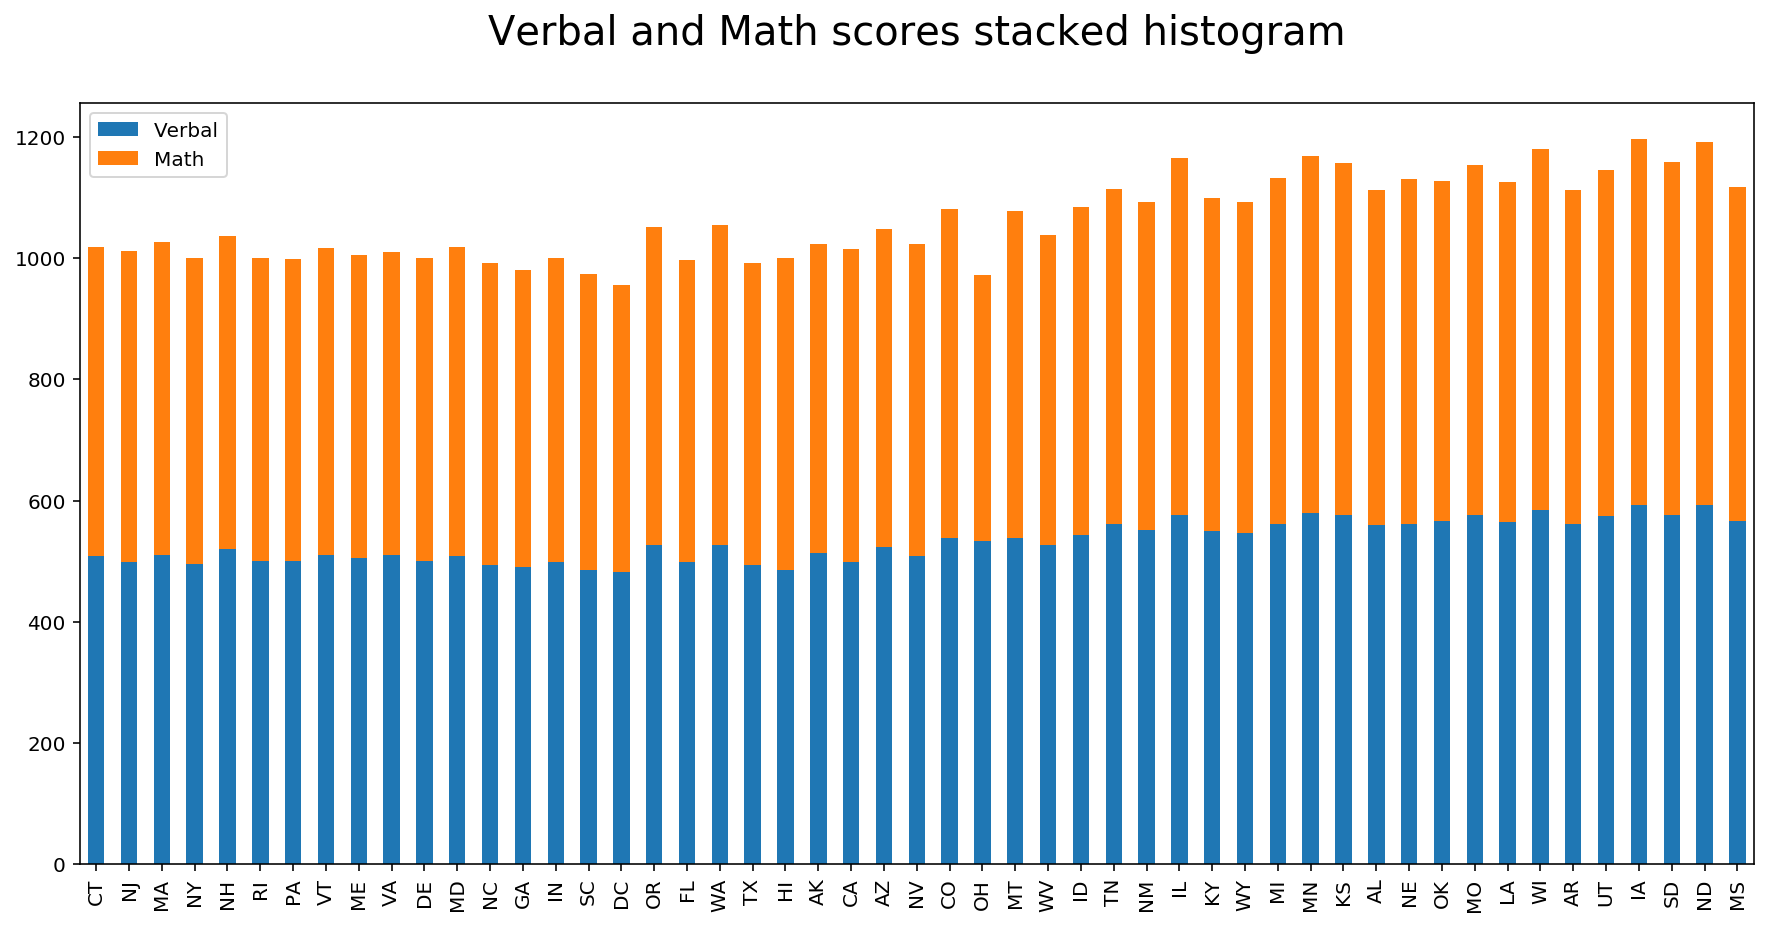

In [27]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

# Plot the bars for just verbal and math
df[['Verbal','Math']].plot.bar(stacked=True, ax=ax)

# put the title on
ax.set_title('Verbal and Math scores stacked histogram\n', fontsize=20)

# change the x-ticks to be the states instead of the row indices
# this wasn't required, but is nice
states = df.State
ax.set_xticklabels(states)

plt.show()



### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

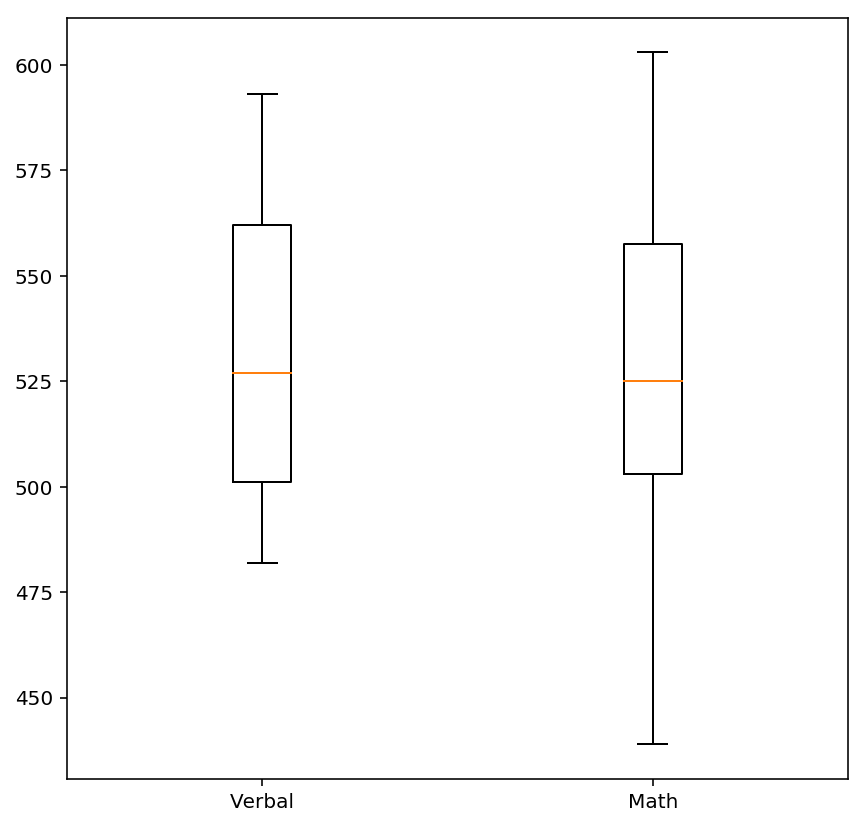

In [33]:
#create a list of data you want to plot
data_to_plot = [df.Verbal, df.Math]

#Create a figure instance
fig = plt.figure(1, figsize=(7,7))

#Create an axes instance
ax = fig.add_subplot(111)

#Create the box plot
bp = ax.boxplot(data_to_plot)

#Set the tick labels for x-axis
ax.set_xticklabels(['Verbal', 'Math']);

#### Using Seaborn

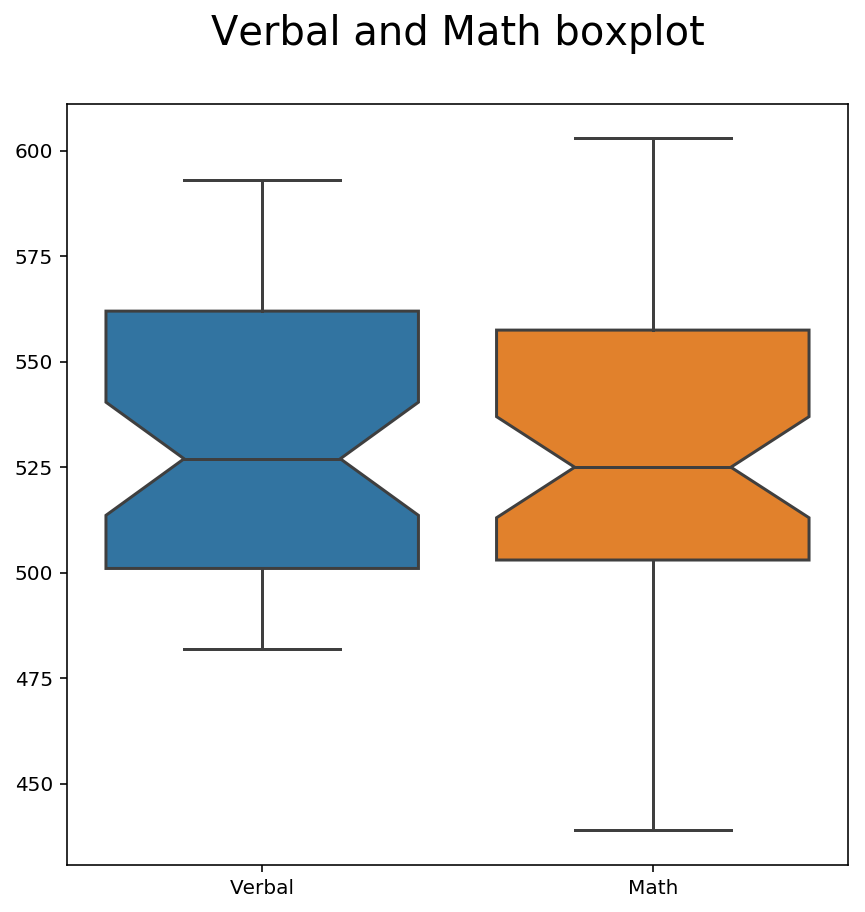

In [29]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=df[['Verbal','Math']], ax=ax, notch=True)

ax.set_title('Verbal and Math boxplot\n', fontsize=20)

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### Standardizing Variables

In [35]:
# Standardized Variable = (Variable - mean of Variable) / std of Variable

#Find the variable mean and std
verbal_mean = np.mean(df.Verbal.values)
verbal_std = np.std(df.Verbal.values)

print verbal_mean
print verbal_std


532.5294117647059
33.03198268415228


In [36]:
# standardize the Verbal variable

stand_verbal = (df.Verbal.values - verbal_mean) / verbal_std

stand_verbal_mean = np.mean(stand_verbal)

stand_verbal_std = np.std(stand_verbal)

#the new mean is close to 0 and std = 1.0
print stand_verbal_mean
print stand_verbal_std

8.098097356089377e-16
0.9999999999999998


In [37]:
# standardize the Math variable

math_mean = np.mean(df.Math.values)
math_std = np.std(df.Math.values)

stand_math = (df.Math.values - math_mean) / math_std
stand_math_mean = np.mean(stand_math)
stand_math_std = np.std(stand_math)

print math_mean
print math_std
print stand_math_mean
print stand_math_std

531.843137254902
35.92987317311408
-8.272249987403127e-16
1.0


In [38]:
# Standardize the Rate variable

rate_mean = np.mean(df.Rate.values)
rate_std = np.std(df.Rate.values)

stand_rate = (df.Rate.values - rate_mean) / rate_std
stand_rate_mean = np.mean(stand_rate)
stand_rate_std = np.std(stand_rate)

print rate_mean
print rate_std
print stand_rate_mean
print stand_rate_std

37.0
27.27923867605359
-8.707631565687502e-18
1.0


[Text(0,0,u'Rate'), Text(0,0,u'Verbal'), Text(0,0,u'Math')]

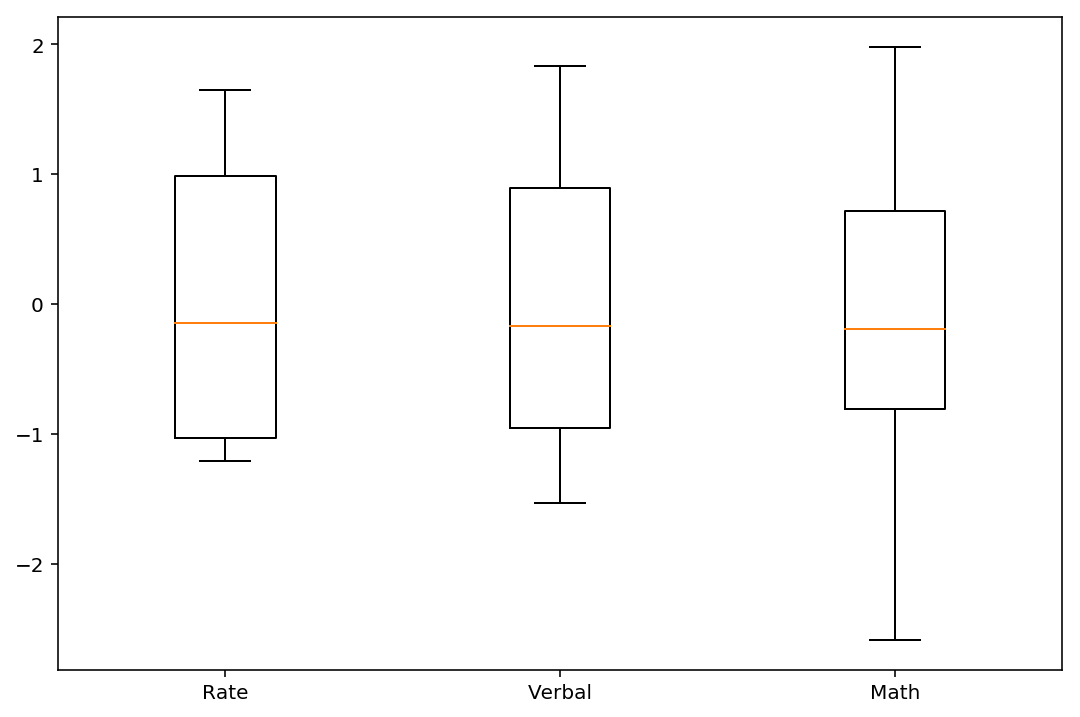

In [39]:
# Plotting the Standardized variables

#create a list of data you want to plot
data_to_plot = [stand_rate, stand_verbal, stand_math]

#Create a figure instance
fig = plt.figure(1, figsize=(9,6))

#Create an axes instance
ax = fig.add_subplot(111)

#Create the box plot
bp = ax.boxplot(data_to_plot)

ax.set_xticklabels(['Rate', 'Verbal', 'Math'])

#### Using Seaborn

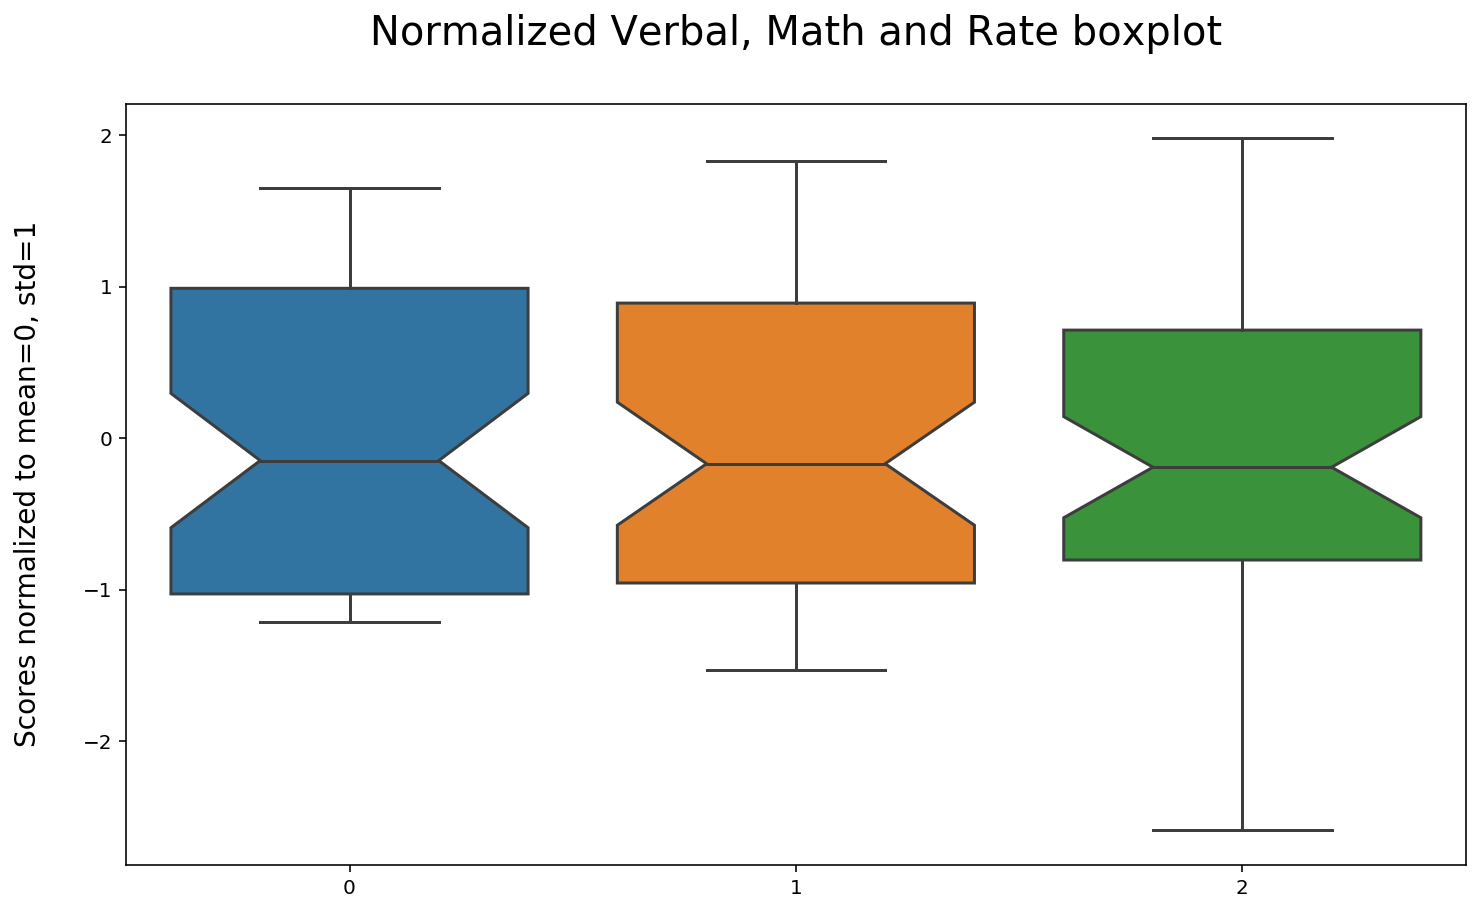

In [40]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

ax = sns.boxplot(data=data_to_plot, ax=ax, notch=True)

ax.set_title('Normalized Verbal, Math and Rate boxplot\n', fontsize=20)
ax.set_ylabel('Scores normalized to mean=0, std=1\n', fontsize=14)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [887]:
#mean of the Verbal score
verbal_mean = df.Verbal.mean()
verbal_mean

532.0192307692307

In [888]:
#Create a mask from the subset
subset = df.loc[:,'Verbal']
mask = subset > verbal_mean

#Apply the mask over the df.State series
high_verbal_states= df.State.loc[mask]
high_verbal_states.head()

26    CO
27    OH
28    MT
30    ID
31    TN
Name: State, dtype: object

In [889]:
# There are 24 States with a higher verbal score than the mean.
len(high_verbal_states)

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [890]:
#Find the verbal median score
verbal_median = df.Verbal.median()

In [891]:
# Create a mask 
subset = df.Verbal
mask = subset > verbal_median

#Apply the mask 
high_Verbal_median = df.State.loc[mask]
high_Verbal_median.head()

19    WA
26    CO
27    OH
28    MT
29    WV
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [892]:
v_m = df['Verbal'].values - df['Math'].values 
df['V_M'] = v_m
df.head()

State  Rate  Verbal  Math  V_M
0    CT    82     509   510   -1
1    NJ    81     499   513  -14
2    MA    79     511   515   -4
3    NY    77     495   505  -10
4    NH    72     520   516    4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [893]:
#chaining the subset, the mask, the sorting of 'Verbal' series
vm_sorted = df.V_M.loc[ df.loc[:,'V_M']>0 ].sort_values(ascending=False)
vm_sorted.head()

27    95
29    15
50    15
45    12
9      9
Name: V_M, dtype: int64

In [894]:
df_vm = pd.Series.to_frame(vm_sorted)
df_vm.head()

V_M
27   95
29   15
50   15
45   12
9     9

In [895]:
#create new_df by dropping columns ['Rate, 'Math, 'Verbal']. Original df unchanged.
new_df = df.drop(['Rate', 'Math', 'Verbal'], axis = 1)

#use inner join to get States with greater Verbal ability
new_df = pd.merge(new_df, df_vm, on='V_M', how='inner')

#sort States with those with greater Verbal ability at the top
#get the top 10 States.
new_df.sort_values('V_M', ascending=False).head(10)



State  V_M
56    OH   95
60    MS   15
59    MS   15
58    WV   15
57    WV   15
61    AR   12
51    TN    9
46    VA    9
48    VA    9
49    TN    9

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [896]:
df6 = df6.drop('V_M', axis = 1)
df6 = df6.drop('State', axis = 1)


In [897]:
df6.corr(method='pearson')

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

 The Correlation Matrix informs me that students with high verbal skills are likely to have high math skills as their correlation is high at 0.89

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [899]:
df.describe()

Rate      Verbal        Math        V_M
count  52.000000   52.000000   52.000000  52.000000
mean   37.153846  532.019231  531.500000   0.519231
std    27.301788   33.236225   36.014975  15.729939
min     4.000000  482.000000  439.000000 -30.000000
25%     9.000000  501.000000  504.000000  -6.000000
50%    33.500000  526.500000  521.000000   0.000000
75%    63.500000  562.000000  555.750000   4.250000
max    82.000000  593.000000  603.000000  95.000000

In [900]:
# 1) count() is the number of non-null observations
# 2) mean() is the Mean of the column values
# 3) std is the Standard Deviation of values
# 4) min() is the minimum value of the column
# 5) 25% the first quartile
# 6) 50% the 2nd quartile also known as the Median
# 7) 75% the 3rd quartile
# 8) max() is the maximum value of the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

### Answer:
#### 1. Covariance matrix is different from the correlation matrix
The covariance matrix measures the same thing as correlation matrix 
except for the fact that correlation is normalized covariance with a value
that is assured to be between -1 and 1. 


2. To convert the covariance, calculate the standard deviation of each of the 2 variables, multiply them and divide the Covariance by the product of it.

CORR(x,y) = COV(x,y)/[std(x) * std(y)]

2
. Correlation matrix is preferred because it gives a comparison
on the normalized scale. It is a quicker way to look at the relationships.

In [901]:
# The covariance matrix
df.cov()

Rate       Verbal         Math         V_M
Rate    745.387632  -804.355958  -760.803922  -43.552036
Verbal -804.355958  1104.646682  1077.147059   27.499623
Math   -760.803922  1077.147059  1297.078431 -219.931373
V_M     -43.552036    27.499623  -219.931373  247.430995

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [47]:
drug_df = pd.read_csv('./drug-use-by-age.csv')
drug_df.head(17)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0                -        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2                -        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [49]:
#clean up the column names
drug_df.columns = drug_df.columns.str.replace('-', '_')
drug_df.head()

age     n  alcohol_use  alcohol_frequency  marijuana_use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana_frequency  cocaine_use cocaine_frequency  crack_use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack_frequency        ...          oxycontin_use oxycontin_frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer_use  tranquilizer_frequency  stimulant_use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant_frequency  meth_use  meth_frequency  sedative_use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative_frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [50]:
drug_df.dtypes
# Cleaning up the dtypes to change some object to float

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency           object
crack_use                  float64
crack_frequency             object
heroin_use                 float64
heroin_frequency            object
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency          object
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency         object
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency              object
sedative_use               float64
sedative_frequency         float64
dtype: object

In [51]:
drug_df['cocaine_frequency'].unique

<bound method Series.unique of 0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16       -
Name: cocaine_frequency, dtype: object>

In [52]:
#Cleaning the cocaine_frequency column
drug_df[drug_df['cocaine_frequency']=='-']
drug_df.loc[drug_df[drug_df['cocaine_frequency']=='-'].index, 'cocaine_frequency'] = 0.0
drug_df['cocaine_frequency'] = drug_df['cocaine_frequency'].astype(float)
drug_df.cocaine_frequency.unique

<bound method Series.unique of 0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16     0.0
Name: cocaine_frequency, dtype: float64>

In [53]:
#Cleaning the crack_frequency column
drug_df[drug_df['crack_frequency']=='-']
drug_df.loc[drug_df[drug_df['crack_frequency']=='-'].index, 'crack_frequency'] = 0.0
drug_df['crack_frequency'] = drug_df['crack_frequency'].astype(float)
drug_df.crack_frequency.unique

<bound method Series.unique of 0      0.0
1      3.0
2      0.0
3      9.5
4      1.0
5     21.0
6     10.0
7      2.0
8      5.0
9     17.0
10     5.0
11     6.0
12     6.0
13    15.0
14    48.0
15    62.0
16     0.0
Name: crack_frequency, dtype: float64>

In [54]:
#Cleaning the heroin_frequency column
drug_df[drug_df['heroin_frequency']=='-']
drug_df.loc[drug_df[drug_df['heroin_frequency']=='-'].index, 'heroin_frequency'] = 0.0
drug_df['heroin_frequency'] = drug_df['heroin_frequency'].astype(float)
drug_df.heroin_frequency.unique

<bound method Series.unique of 0      35.5
1       0.0
2       2.0
3       1.0
4      66.5
5      64.0
6      46.0
7     180.0
8      45.0
9      30.0
10     57.5
11     88.0
12     50.0
13     66.0
14    280.0
15     41.0
16    120.0
Name: heroin_frequency, dtype: float64>

In [55]:
#Cleaning the inhalant_frequency  column
drug_df[drug_df['inhalant_frequency']=='-']
drug_df.loc[drug_df[drug_df['inhalant_frequency']=='-'].index, 'inhalant_frequency'] = 0.0
drug_df['inhalant_frequency'] = drug_df['inhalant_frequency'].astype(float)
drug_df.inhalant_frequency.unique

<bound method Series.unique of 0     19.0
1     12.0
2      5.0
3      5.5
4      3.0
5      4.0
6      4.0
7      3.0
8      4.0
9      2.0
10     4.0
11     2.0
12     4.0
13     3.5
14    10.0
15    13.5
16     0.0
Name: inhalant_frequency, dtype: float64>

In [56]:
#Cleaning the oxycontin_frequency  column
drug_df[drug_df['oxycontin_frequency']=='-']
drug_df.loc[drug_df[drug_df['oxycontin_frequency']=='-'].index, 'oxycontin_frequency'] = 0.0
drug_df['oxycontin_frequency'] = drug_df['oxycontin_frequency'].astype(float)
drug_df.oxycontin_frequency.unique

<bound method Series.unique of 0     24.5
1     41.0
2      4.5
3      3.0
4      4.0
5      6.0
6      7.0
7      7.5
8     12.0
9     13.5
10    17.5
11    20.0
12    13.5
13    46.0
14    12.0
15     5.0
16     0.0
Name: oxycontin_frequency, dtype: float64>

In [57]:
#Cleaning the meth_frequency  column
drug_df[drug_df['meth_frequency']=='-']
drug_df.loc[drug_df[drug_df['meth_frequency']=='-'].index, 'meth_frequency'] = 0.0
drug_df['meth_frequency'] = drug_df['meth_frequency'].astype(float)
drug_df.meth_frequency.unique

<bound method Series.unique of 0       0.0
1       5.0
2      24.0
3      10.5
4      36.0
5      48.0
6      12.0
7     105.0
8      12.0
9       2.0
10     46.0
11     21.0
12     30.0
13     54.0
14    104.0
15     30.0
16      0.0
Name: meth_frequency, dtype: float64>

In [58]:
#Successfully change objects to floats
drug_df.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

In [59]:
drug_df.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [60]:
# Looking at the shape of the data
drug_df.shape

(17, 28)

In [61]:
# Looking at the descriptive statistics summary
drug_df.describe()

n  alcohol_use  alcohol_frequency  marijuana_use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana_frequency  cocaine_use  cocaine_frequency  crack_use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack_frequency  heroin_use         ...          oxycontin_use  \
count        17.000000   17.000000         ...              17.000000   
mean         12.382353    0.352941         ...               0.935294   
std          17.361532    0.333762         ...               0.608216   
min           0.000000    0.000000         ...               0.000000   
25%           2.000000    0.100000         ...               0.400000   
50%           6.000000    0.200000         ...               1.100000   
75%          15.000000    0.600000         ...               1.400000   
max          62.000000    1.100000         ...               1.700000   

       oxycontin_frequency  tranquilizer_use  tranquilizer_frequency  \
count            17.000000         17.000000               17.000000   
mean             13.941176          2.805882               11.735294   
std              12.902134          1.753379               11.485205   
min               0.000000          0.200000                4.500000   
25%               5.000000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              17.500000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant_use  stimulant_frequency   meth_use  meth_frequency  \
count      17.000000            17.000000  17.000000       17.000000   
mean        1.917647            31.147059   0.382353       31.735294   
std         1.407673            85.973790   0.262762       32.206423   
min         0.000000             2.000000   0.000000        0.000000   
25%         0.600000             7.000000   0.200000       10.500000   
50%         1.800000            10.000000   0.400000       24.000000   
75%         3.000000            12.000000   0.600000       46.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative_use  sedative_frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 27 columns]

In [62]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol_use                17 non-null float64
alcohol_frequency          17 non-null float64
marijuana_use              17 non-null float64
marijuana_frequency        17 non-null float64
cocaine_use                17 non-null float64
cocaine_frequency          17 non-null float64
crack_use                  17 non-null float64
crack_frequency            17 non-null float64
heroin_use                 17 non-null float64
heroin_frequency           17 non-null float64
hallucinogen_use           17 non-null float64
hallucinogen_frequency     17 non-null float64
inhalant_use               17 non-null float64
inhalant_frequency         17 non-null float64
pain_releiver_use          17 non-null float64
pain_releiver_frequency    17 non-null float64
oxycontin_use              17 non-null float64
oxycont

In [63]:
# looking at the index
drug_df.set_index('age', inplace=True)
drug_df.head()

n  alcohol_use  alcohol_frequency  marijuana_use  marijuana_frequency  \
age                                                                             
12   2798          3.9                3.0            1.1                  4.0   
13   2757          8.5                6.0            3.4                 15.0   
14   2792         18.1                5.0            8.7                 24.0   
15   2956         29.2                6.0           14.5                 25.0   
16   3058         40.1               10.0           22.5                 30.0   

     cocaine_use  cocaine_frequency  crack_use  crack_frequency  heroin_use  \
age                                                                           
12           0.1                5.0        0.0              0.0         0.1   
13           0.1                1.0        0.0              3.0         0.0   
14           0.1                5.5        0.0              0.0         0.1   
15           0.5                4.0        0.1              9.5         0.2   
16           1.0                7.0        0.0              1.0         0.1   

            ...          oxycontin_use  oxycontin_frequency  tranquilizer_use  \
age         ...                                                                 
12          ...                    0.1                 24.5               0.2   
13          ...                    0.1                 41.0               0.3   
14          ...                    0.4                  4.5               0.9   
15          ...                    0.8                  3.0               2.0   
16          ...                    1.1                  4.0               2.4   

     tranquilizer_frequency  stimulant_use  stimulant_frequency  meth_use  \
age                                                                         
12                     52.0            0.2                  2.0       0.0   
13                     25.5            0.3                  4.0       0.1   
14                      5.0            0.8                 12.0       0.1   
15                      4.5            1.5                  6.0       0.3   
16                     11.0            1.8                  9.5       0.3   

     meth_frequency  sedative_use  sedative_frequency  
age                                                    
12              0.0           0.2                13.0  
13              5.0           0.1                19.0  
14             24.0           0.2                16.5  
15             10.5           0.4                30.0  
16             36.0           0.2                 3.0  

[5 rows x 27 columns]

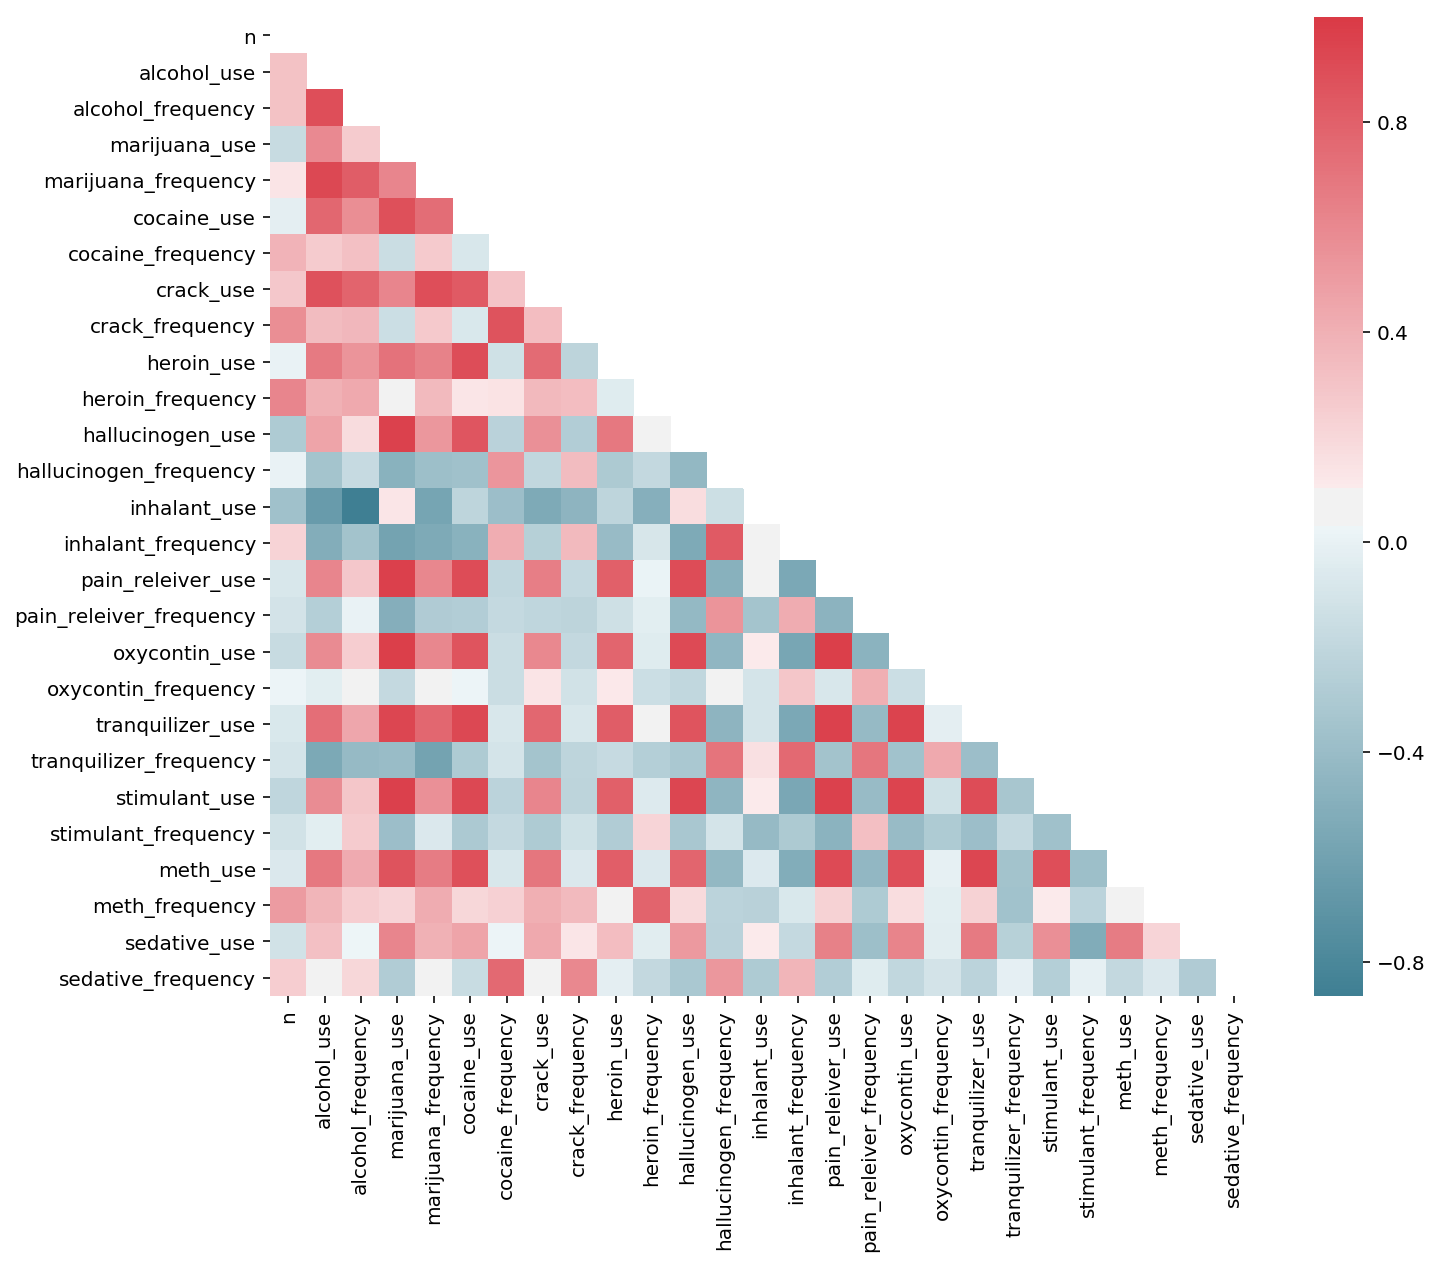

In [64]:
#Plotting a correlation map
drug_corr = drug_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a mask for the upper triangle
mask = np.zeros_like(drug_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(drug_corr, mask=mask, cmap=cmap, xticklabels=drug_corr.columns, yticklabels=drug_corr.columns)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [65]:
# 1. A SPECIFIC QUESTION I WOULD LIKE TO ASK:  
# Is alcohol use evenly distributed among the age groups?

In [66]:
drug_df['alcohol_use'].sort_values(ascending=False)

age
22-23    84.2
21       83.2
24-25    83.1
26-29    80.7
30-34    77.5
35-49    75.0
20       69.7
50-64    67.2
19       64.6
18       58.7
17       49.3
65+      49.3
16       40.1
15       29.2
14       18.1
13        8.5
12        3.9
Name: alcohol_use, dtype: float64

In [67]:
# EDA of my choice is visual histogram plot. 
# Age vs Alcohol_Use

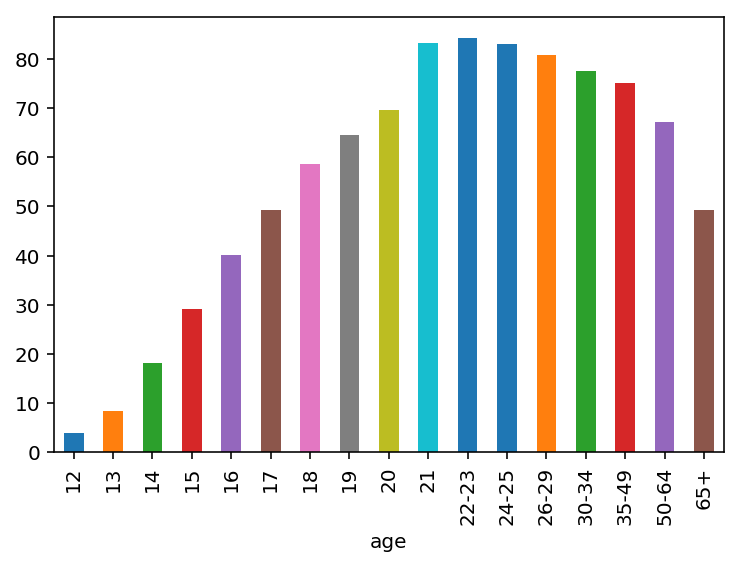

In [68]:
drug_df['alcohol_use'].plot(kind='bar')

In [69]:
# REPORT:
# From the bar plot, we can quickly observed that young adults
# have a higher alcohol use. 
# Therefore, alcohol_use is not evenly distributed.
# The huge spike comes at 21 years of age, as this is the legal
# drinking age in the United States. 
# We see the high alcohol_use is higher from 21 yo 
# to 49 yo.
# This age group is also where people are earning an income, hence,
# they probably have more money to spend on alcohol than people who
# are not working or have retired. 
# This is what we believe so we set this as our Null Hypothesis.

In [70]:
# Null Hypothesis : We believe that high alcohol use is between 21yo to 49yo.
# Alternative Hypothesis: The null hypothesis is false.

# I use the t-test in this case. 

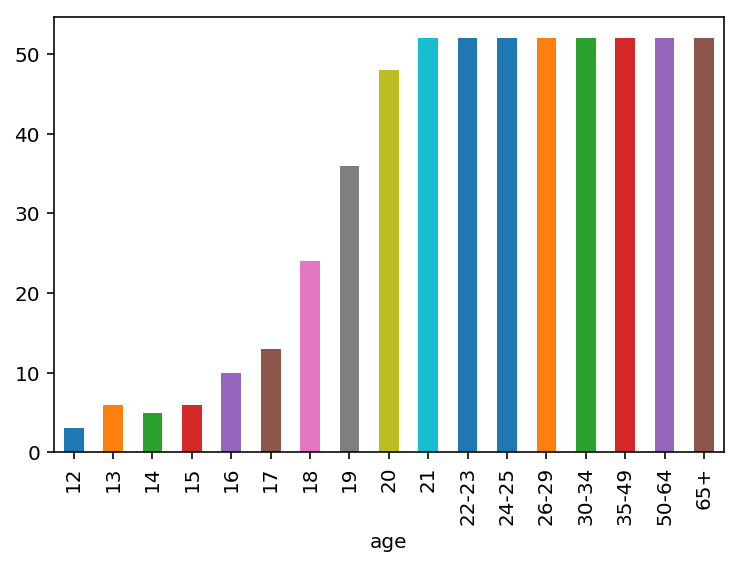

In [71]:
#Plot the expected frequency of the alcohol use
drug_df['alcohol_frequency'].plot(kind='bar')

In [72]:
#Calculate the mean difference between alcohol_use and alcohol_frequency
mean_diff = drug_df.alcohol_use.mean() - drug_df.alcohol_frequency.mean()
mean_diff

22.076470588235296

In [73]:
#Calculating the T-Statisti
t_stat, p_value = stats.ttest_ind(drug_df.alcohol_use, drug_df.alcohol_frequency)
pprint('t-statistic={}, p-value={}'.format(t_stat, p_value))

't-statistic=2.65321305853, p-value=0.0123086088738'


Since the p-value is less than 0.05 we REJECT the null hypothesis that high alcohol use is only between 21yo and 49 year old. 

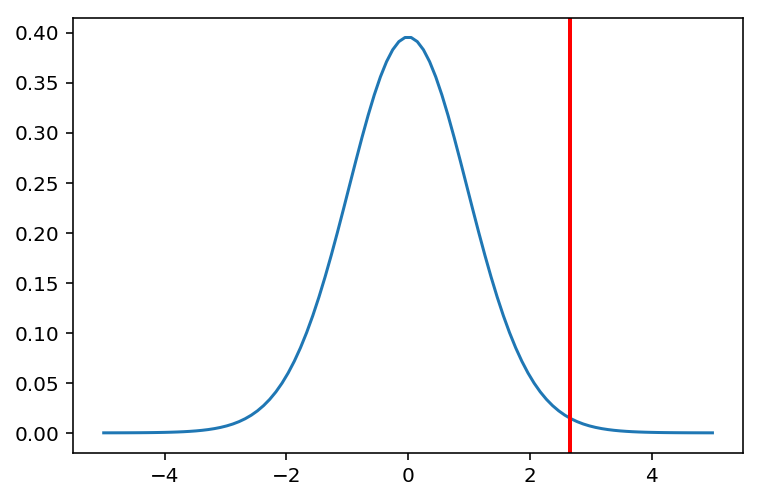

In [74]:
#Visualizing the T-Statistic

#Calculating the degree of freedom
deg = len(drug_df.alcohol_use) + len(drug_df.alcohol_frequency) -2

# Plot the t-statistic on the t-distribution.
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, df=deg)

plt.plot(x,y) # this is the distribution
plt.axvline(t_stat, c='red', lw=2) #this is out t-statistics

plt.show()

In [75]:
drug_df.alcohol_use

age
12        3.9
13        8.5
14       18.1
15       29.2
16       40.1
17       49.3
18       58.7
19       64.6
20       69.7
21       83.2
22-23    84.2
24-25    83.1
26-29    80.7
30-34    77.5
35-49    75.0
50-64    67.2
65+      49.3
Name: alcohol_use, dtype: float64

In [76]:
drug_df.alcohol_frequency

age
12        3.0
13        6.0
14        5.0
15        6.0
16       10.0
17       13.0
18       24.0
19       36.0
20       48.0
21       52.0
22-23    52.0
24-25    52.0
26-29    52.0
30-34    52.0
35-49    52.0
50-64    52.0
65+      52.0
Name: alcohol_frequency, dtype: float64

There may be some incorrect data collection at age > 49 range which causes us to reject the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

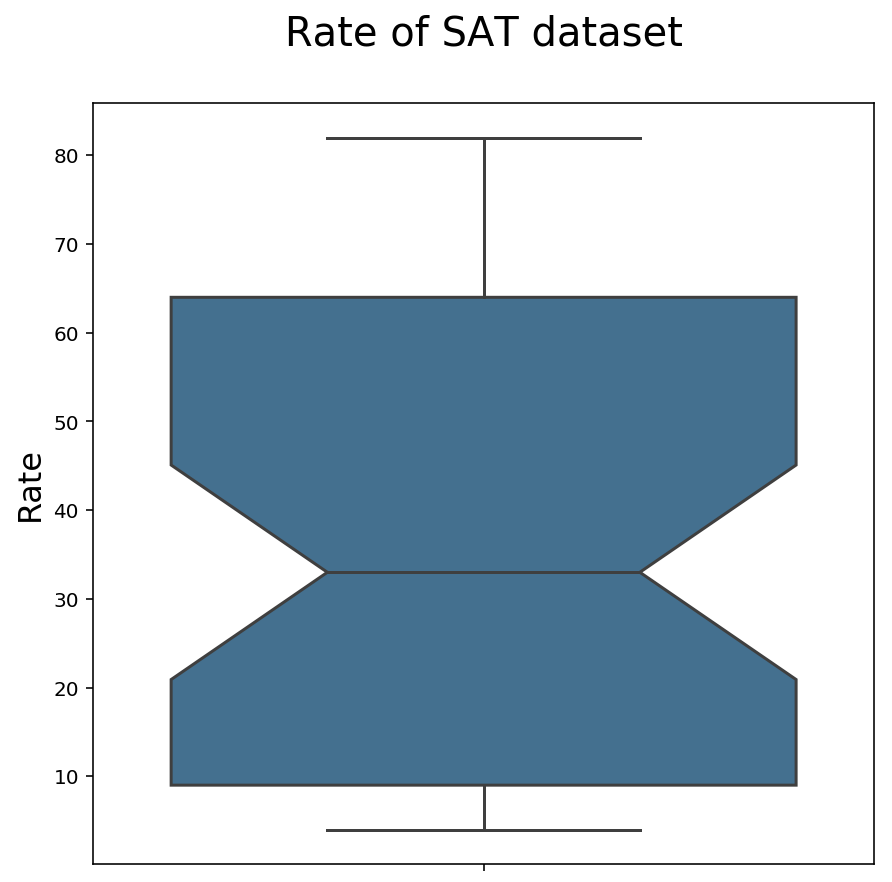

In [90]:
# Rate variable from the SAT dataset

fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(df.Rate, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('Rate', fontsize=16)
ax.set_title('Rate of SAT dataset\n', fontsize=20)

plt.show()

From the above plot, the outliers could be in the upper end. 

In [107]:
rate = df.Rate.values

Outliers are observations numerically distant from the rest of the data. When reviewing the boxplot, an outlier is defined as a data point that is located outside the whiskers of the boxplot. 

 If a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier. The specified number of standard deviations is called the threshold. The default value is 3.



In [108]:
threshold = 3.0*np.std(rate)
outlier_count = np.sum(np.abs(rate - rate_mean) >= strict_threshold)
print outlier_count
print rate[(np.abs(rate - rate_mean) >= strict_threshold)]

3
[82 81 79]


There are no outliers based on the default 3.0 std as show in the code above and the plot below. Why is this so? A possible reason could be because the outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected.

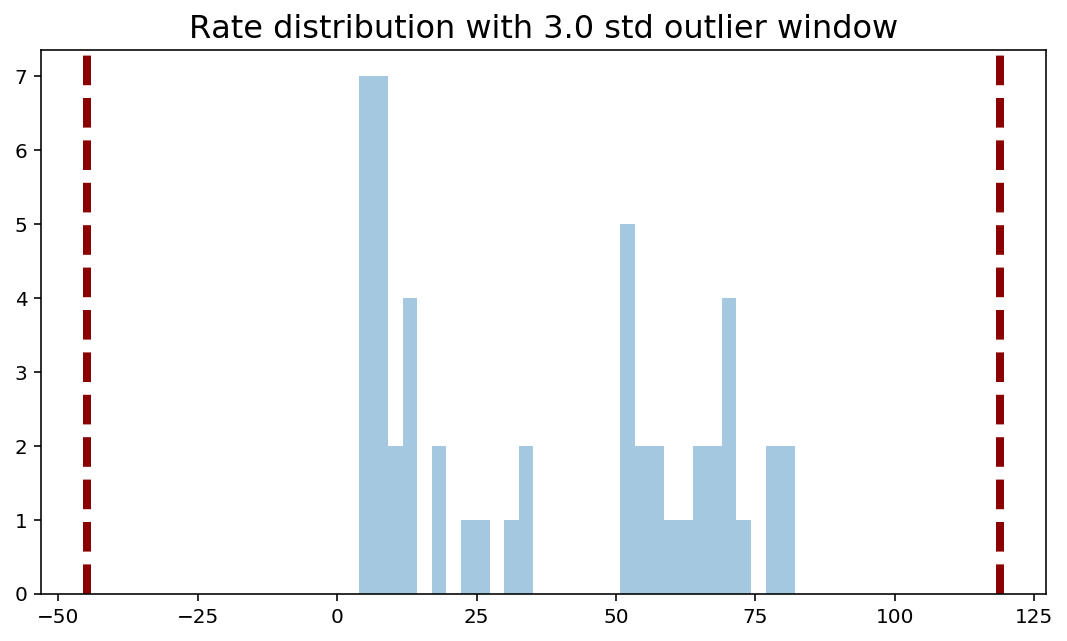

In [109]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

ax = sns.distplot(rate, kde=False, bins=30, ax=ax)

rate_mean = np.mean(rate)
lower_bound = rate_mean - threshold
upper_bound = rate_mean + threshold

ax.axvline(lower_bound, linewidth=4, color='darkred', linestyle='dashed')
ax.axvline(upper_bound, linewidth=4, color='darkred', linestyle='dashed')

ax.set_title('Rate distribution with 3.0 std outlier window', fontsize=16)

plt.show()

I try to narrow the threshold to detect outliers. Working from 2.0, 1.75 to 1.5.

In [110]:
strict_threshold = 1.5*np.std(rate)
outlier_count = np.sum(np.abs(rate - rate_mean) >= strict_threshold)
print outlier_count
print rate[(np.abs(rate - rate_mean) >= strict_threshold)]

3
[82 81 79]


Surely, as I guessed in the beginning, the outliers are in the upper end. 

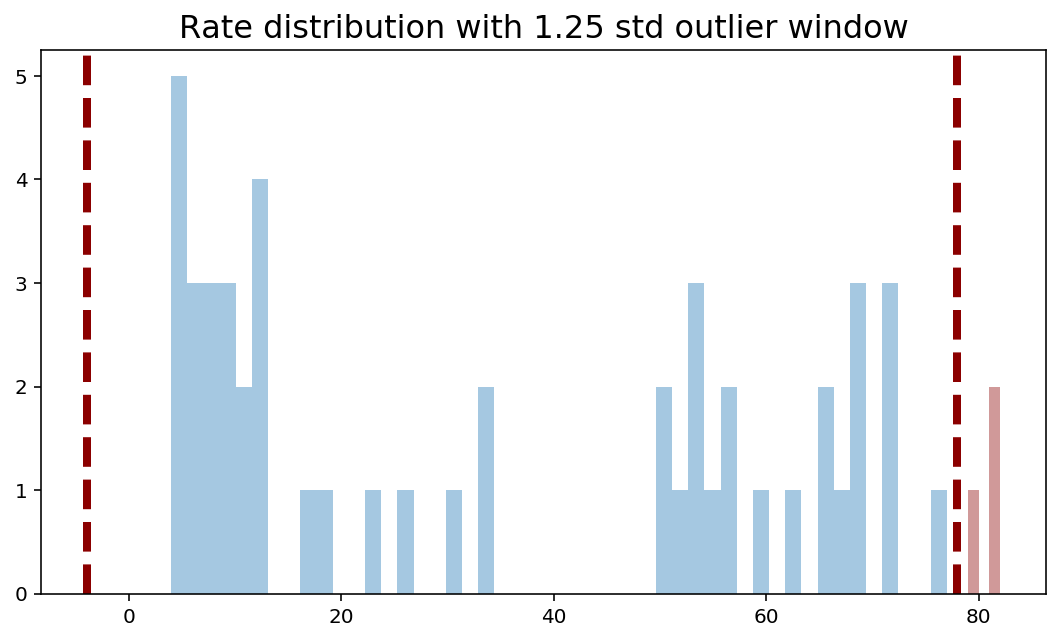

In [113]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()

no_outliers = rate[(np.abs(rate - rate_mean) < strict_threshold)]
original = rate[(np.abs(rate - rate_mean) >= strict_threshold)]

ax = sns.distplot(no_outliers, kde=False, 
                  bins=len(no_outliers), ax=ax)

ax = sns.distplot(original, kde=False, 
                  bins=len(original), ax=ax, color='darkred')

rate_mean = np.mean(rate)
lower_bound = rate_mean - strict_threshold
upper_bound = rate_mean + strict_threshold

ax.axvline(lower_bound, linewidth=4, color='darkred', linestyle='dashed')
ax.axvline(upper_bound, linewidth=4, color='darkred', linestyle='dashed')

ax.set_title('Rate distribution with 1.25 std outlier window', fontsize=16)

plt.show()

In [114]:
print 'Original mean, median, std:', [np.mean(rate), np.median(rate), np.std(rate)]
print 'Bounded mean, median, std:', [np.mean(no_outliers), np.median(no_outliers), np.std(no_outliers)]



Original mean, median, std: [37.0, 33.0, 27.27923867605359]
Bounded mean, median, std: [34.270833333333336, 28.5, 25.767178398864104]


When Outliers are removed, the result is a reduced the mean, median, and standard deviation. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [78]:
stats.spearmanr(df.Verbal, df.Math)[0]

0.9094125143903472

#### STEP 1) Calculate the rank of Verbal's 
#### STEP 2) Calculate the rank of Math's
#### STEP 3) Then calculate the Pearson's correlation coefficient on the ranked Verbal and ranked Math.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [79]:
# 1. Convert Rate to percentiles in the sat scores as a new column.
df['Rate_Percentile'] = [ round(np.percentile(df.Rate, i)) for i in df.Rate ]


/Users/matt_dynasty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
# 2.Show the percentile of California in Rate.
df.loc[ (df.State == 'CA') , 'Rate_Percentile']

23    34.0
Name: Rate_Percentile, dtype: float64

3.
Percentile is basically measuring according to rank which Spearman
also measures in a different way.  

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

    1. Outliers are quickly evident when looking at the percentile.

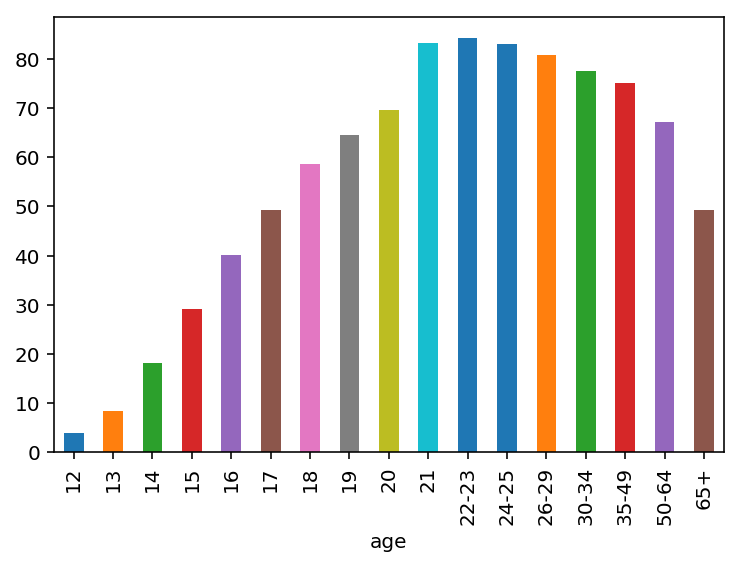

In [81]:
#2. plot 'alcohol_use'
drug_df.alcohol_use.plot(kind='bar')

In [82]:
#3. Sort in ascending order to check for ranks
sort_by_rank = np.sort(drug_df.alcohol_use)
sort_by_rank

array([ 3.9,  8.5, 18.1, 29.2, 40.1, 49.3, 49.3, 58.7, 64.6, 67.2, 69.7,
       75. , 77.5, 80.7, 83.1, 83.2, 84.2])

In [83]:
from matplotlib import mlab
pct = np.array([0.0, 25.0, 50.0, 75.0, 100.0])

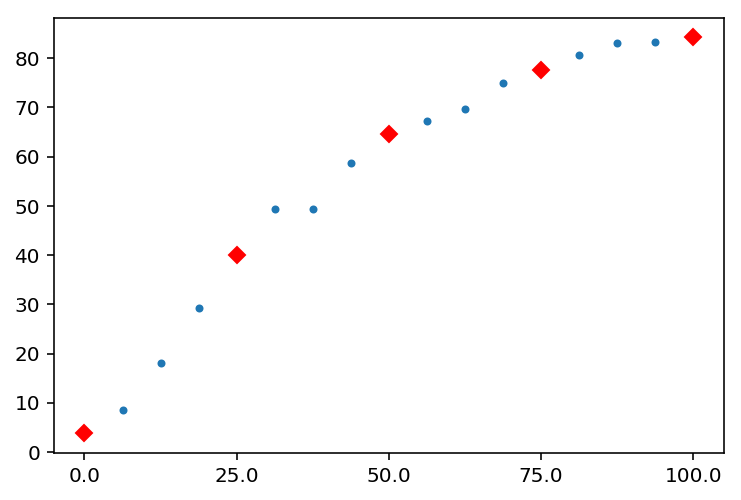

In [84]:
#The blue dots shows the variable values
plt.plot(sort_by_rank, marker='.', linestyle='none')
perc = mlab.prctile(sort_by_rank, p=pct)

#The red diamond shows the quantile
plt.plot((len(sort_by_rank)-1) * pct/100., perc, 'ro', marker='D')
plt.xticks((len(sort_by_rank)-1) * pct/100., map(str, pct))
plt.show()


I first sort the variable values according to rank. Then I assign a rank to them. Then I plot them according to their position in the quantile range. 

In [88]:
drug_df.alcohol_use

age
12        3.9
13        8.5
14       18.1
15       29.2
16       40.1
17       49.3
18       58.7
19       64.6
20       69.7
21       83.2
22-23    84.2
24-25    83.1
26-29    80.7
30-34    77.5
35-49    75.0
50-64    67.2
65+      49.3
Name: alcohol_use, dtype: float64

In [89]:
sum(drug_df.alcohol_use)

942.3